### Abstract
[insert abstract here]

### Setup
First we can load in the data as a Pandas dataframe.

In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

We can then look at the dataframe we have made:

In [281]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


We can shorten the species of the penguins to just the first word, which will make it easier to catalogue them.

In [282]:
train["Species"] = train["Species"].str.split().str.get(0)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap,Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


### Figure Creation
Now that we've preprocessed the data a little bit, we can create a few plots to get an idea of what this data means. Below, we use seaborn to create a scatterplot and a bar plot.

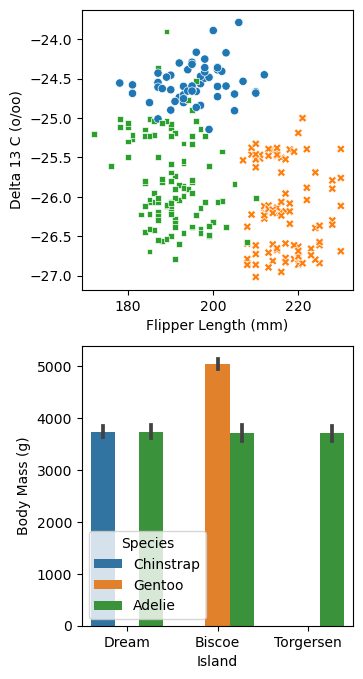

In [283]:
fig, ax = plt.subplots(2, 1, figsize = (3.5, 8))

p1 = sns.scatterplot(train, x = "Flipper Length (mm)", y = 'Delta 13 C (o/oo)', hue = "Species", style = "Species", ax = ax[0], legend=False)
p2 = sns.barplot(train, x = "Island", y = "Body Mass (g)", hue = 'Species')

**Figure 1:** A scatterplot showing flipper length against Delta 13 C for three species of penguins. We can see that there is some correlation, but at the edges the species overlap a bit.

**Figure 2:** A bar graph showing body mass for each species on each island. Torgerson only contains Adelie, Dream has pretty equal body masses for Adelie and Chinstrap, and Biscoe has Gentoo penguins at a much larger size than the other penguins.

Now that we've seen some of the data plotted out, we can continue the preprocessing step. The predict() function below drops unnecessary columns, rows/columns with null values, assigns species to integers rather than strings, and then splits the species into a separate data structure, y.

In [284]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

x_train, y_train = prepare_data(train)
x_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,51.1,16.5,225.0,5250.0,8.20660,-26.36863,True,False,False,True,False,True,False,True
271,35.9,16.6,190.0,3050.0,8.47781,-26.07821,False,False,True,True,True,False,True,False
272,39.5,17.8,188.0,3300.0,9.66523,-25.06020,False,True,False,True,False,True,True,False
273,36.7,19.3,193.0,3450.0,8.76651,-25.32426,False,False,True,True,False,True,True,False


### Deciding on attributes
We now need to pick the attributes that will yield the best prediction accuracy. To do this, we will use an exhaustive approach, where we check the accuracy of a linear regression model trained on all possible feature combinations. In the code below, we loop through all possible combinations of qualitative and quantitative attributes. In each iteration, we train a model on the different combinations of features, and we compile an array of all the combinations (along with their scores and the model that was trained on them).

In [292]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression

all_qual_cols = ["Clutch Completion", "Island", "Sex", "Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]
scores = []
combo_array = []


for qual in all_qual_cols:
  qual_cols = [col for col in x_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols                               #<1>
    combo_array.append(cols)                                    #<1>
    LR = LogisticRegression()                                   #<2>
    LR.fit(x_train[cols], y_train)                              #<2>
    new_score = LR.score(x_train[cols], y_train)                #<3>
    scores.append((cols, new_score, LR))                        #<4>
# for combo in combo_array:
#   LR = LogisticRegression()
#   LR.fit(x_train[combo], y_train)
#   new_score = LR.score(x_train[combo], y_train)
#   scores.append((combo, new_score, LR))


/Users/ellisterling/anaconda3/envs/ml-0451/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ellisterling/anaconda3/envs/ml-0451/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

1. Gather the features for this iteration
2. Create the Logistic Regression model and train it on our selected features
3. Score the trained model
4. Add the features, score, and model as a tuple to the array of our catalogued models

In [293]:
from operator import itemgetter
best_combo = max(scores, key = itemgetter(1))
print(best_combo)
best_attrs = best_combo[0]
best_score = best_combo[1]
best_lr = best_combo[2]

(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'], 0.99609375, LogisticRegression())


It looks like Island, Culmen Length, and Culmen Depth are our most helpful attributes.

Next, we need to prepare our test data in the same way that we prepared our training data.

In [295]:
test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)
test["Species"] = test["Species"].str.split().str.get(0)
x_test, y_test = prepare_data(test)

We can then score our trained model on its performance with the test data.

In [294]:
best_lr.score(x_test[best_attrs], y_test)

1.0

Great! We have 100% accuracy. Now for some more plotting...
### Plotting the Category Regions
Using Matplotlib, we can 

In [288]:
from matplotlib import pyplot as plt
import numpy as np

from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

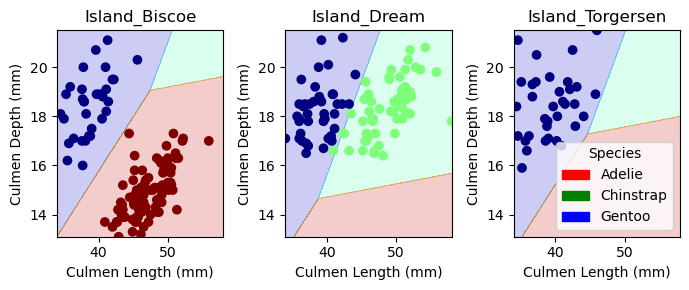

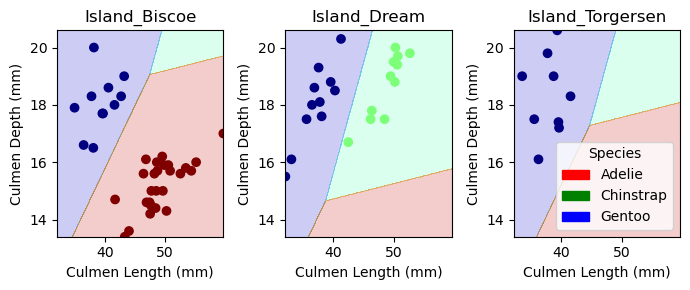

In [297]:
plot_regions(best_lr, x_train[best_attrs], y_train)
plot_regions(best_lr, x_test[best_attrs], y_test)

Confusion matrix:

In [290]:
from sklearn.metrics import confusion_matrix

y_test_pred = best_lr.predict(x_test[best_attrs])
C = confusion_matrix(y_test, y_test_pred)
C

array([[31,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 26]])

In [291]:
for i in range(3):
    for j in range(3):
        print(f"There were {C[i,j]} {le.classes_[i]} penguin(s) who were classified as {le.classes_[j]}.")

There were 31 Adelie penguin(s) who were classified as Adelie.
There were 0 Adelie penguin(s) who were classified as Chinstrap.
There were 0 Adelie penguin(s) who were classified as Gentoo.
There were 0 Chinstrap penguin(s) who were classified as Adelie.
There were 11 Chinstrap penguin(s) who were classified as Chinstrap.
There were 0 Chinstrap penguin(s) who were classified as Gentoo.
There were 0 Gentoo penguin(s) who were classified as Adelie.
There were 0 Gentoo penguin(s) who were classified as Chinstrap.
There were 26 Gentoo penguin(s) who were classified as Gentoo.


### Discussion
[insert discussion here]